# Load data

In [2]:
import tensorflow as tf

img_size = (256, 256)  
batch_size = 16

train_ds = tf.keras.utils.image_dataset_from_directory(
    "Teeth_Dataset/Training",
    image_size=img_size,
    batch_size=batch_size,
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "Teeth_Dataset/validation",
    image_size=img_size,
    batch_size=batch_size,
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "Teeth_Dataset/testing",
    image_size=img_size,
    batch_size=batch_size,
)

for images, labels in train_ds.take(1):  # take 1 batch
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)
    print("Labels:", labels.numpy())




Found 3087 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.
Image batch shape: (16, 256, 256, 3)
Label batch shape: (16,)
Labels: [1 1 1 1 6 1 1 3 1 2 5 0 6 3 2 2]


In [3]:
print("Class names:", train_ds.class_names)


Class names: ['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']


# Preprocessing 

In [18]:
"""
resize 64
normalization (done) 
data augmentation 

"""


from tensorflow.keras import layers

# Define augmentation transformations
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),     # flip images
    layers.RandomRotation(0.1),          # rotate ±10%
    layers.RandomZoom(0.1),              # zoom in/out
    layers.RandomContrast(0.1),          # contrast variation
])

# Apply augmentation only to training dataset
def preprocess_train(image, label):
    image = tf.cast(image, tf.float32) / 255.0   # normalize
    image = data_augmentation(image)             # augment
    return image, label

def preprocess_test(image, label):
    image = tf.cast(image, tf.float32) / 255.0   # normalize only
    return image, label

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.map(preprocess_train, num_parallel_calls=AUTOTUNE)
val_ds   = val_ds.map(preprocess_test, num_parallel_calls=AUTOTUNE)
test_ds  = test_ds.map(preprocess_test, num_parallel_calls=AUTOTUNE)


    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0236487].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0104340315..1.000818].


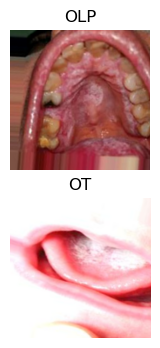

In [19]:
for images, labels in train_ds.take(1): 
    plt.figure(figsize=(8, 4))

    for i in range(2):  # show 2 images
        # Original image
        ax = plt.subplot(2, 2, 2*i + 1)
        plt.imshow(images[i].numpy().astype("float32"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

    plt.show()